In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("len_v_iters3.txt", delimiter="\t")
df = pd.DataFrame(data)
df.columns = ["frac_len", "n_iters", "error", "ub_error"]
# df.sort_values([ "frac_len", "n_iters"], inplace=True)
# df.sort_values("frac_len", inplace=True)
print(df)

rdf = df.copy()
rdf["ub_error"] = rdf["ub_error"] - 10**-10
rdf = rdf[rdf["ub_error"] < 0]
rdf["ub_error"] = abs(rdf["ub_error"])
# print(rdf)
# print(df)

   frac_len  n_iters         error      ub_error
0      18.0     16.0  1.495053e-10  1.578436e-10
1      18.0     17.0  8.822371e-11  9.327310e-11
2      18.0     18.0  7.844606e-11  8.282146e-11
3      19.0     16.0  1.012266e-10  1.067148e-10
4      19.0     17.0  4.015170e-11  4.222726e-11
5      19.0     18.0  2.474200e-11  2.607583e-11
6      20.0     16.0  8.931915e-11  9.397087e-11
7      20.0     17.0  2.553308e-11  2.687783e-11
8      20.0     18.0  9.619477e-12  1.010918e-11


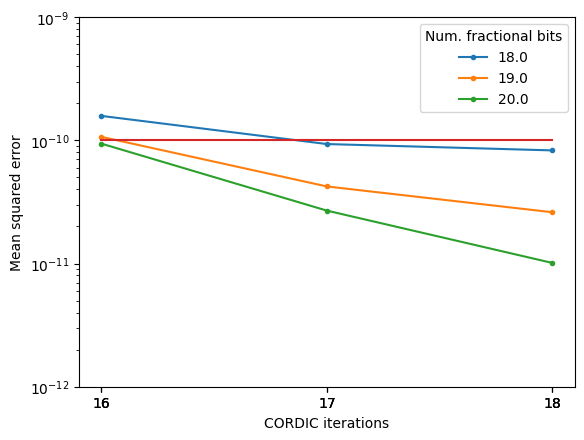

In [3]:
n_iters = df["n_iters"].unique()
frac_lens = df["frac_len"].unique()
frac_lens.sort()

fig, ax = plt.subplots()

for f in frac_lens:
    d = df.loc[df["frac_len"]==f]
    ax.plot(d["n_iters"], d["ub_error"], ".-")
    
# draw horizontal line at error cutoff
ax.plot(n_iters, [10**-10] * len(n_iters))
    
ax.set_yscale("log")
ax.set_yticks([10 ** -i for i in range(9,13)])
ax.set_ylabel("Mean squared error")

ax.set_xticks(df["n_iters"])
ax.set_xlabel("CORDIC iterations")


ax.legend(frac_lens, title="Num. fractional bits")

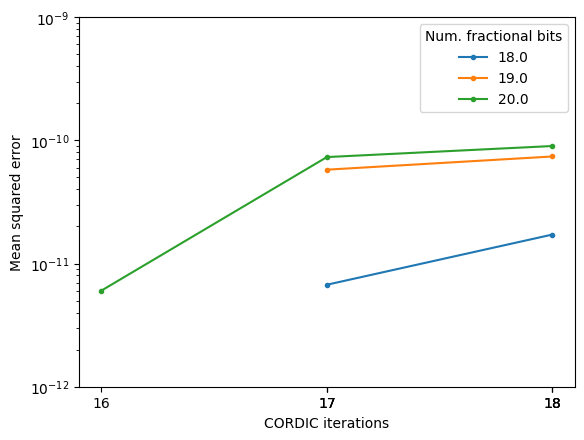

In [4]:
n_iters = rdf["n_iters"].unique()
frac_lens = rdf["frac_len"].unique()

fig, ax = plt.subplots()

for f in frac_lens:
    d = rdf.loc[rdf["frac_len"]==f]
    ax.plot(d["n_iters"], d["ub_error"], ".-")
    
# # draw horizontal line at error cutoff
# ax.plot(n_iters, [10**-10] * len(n_iters))
    
ax.set_yscale("log")
ax.set_yticks([10 ** -i for i in range(9,13)])
ax.set_ylabel("Mean squared error")

ax.set_xticks(rdf["n_iters"])
ax.set_xlabel("CORDIC iterations")

ax.legend(frac_lens, title="Num. fractional bits")